# Import Data and Required Package
Numpy,Pandas,matplotlib and plotly

In [1]:
import pandas as pd
import seaborn as sns
import plotly as px
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv("EasyVisa.csv")
df.head()


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:

df.shape

(25480, 12)

In [4]:

df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [5]:

df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


# Explotary Data Analysis

In [7]:
# define numerical and categorical
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
# print
print(f"we have {len(numerical_feature)} numerical feature {numerical_feature}")
print(f"we have {len(categorical_feature)} categorical feature {categorical_feature}")

we have 3 numerical feature ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
we have 9 categorical feature ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [8]:
# proportion of count data 
for col in categorical_feature:
    print(df[col].value_counts(normalize=True)*100)
    print("--------------------------------")

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
--------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
--------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
--------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
--------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
--------------------------------
region_of_

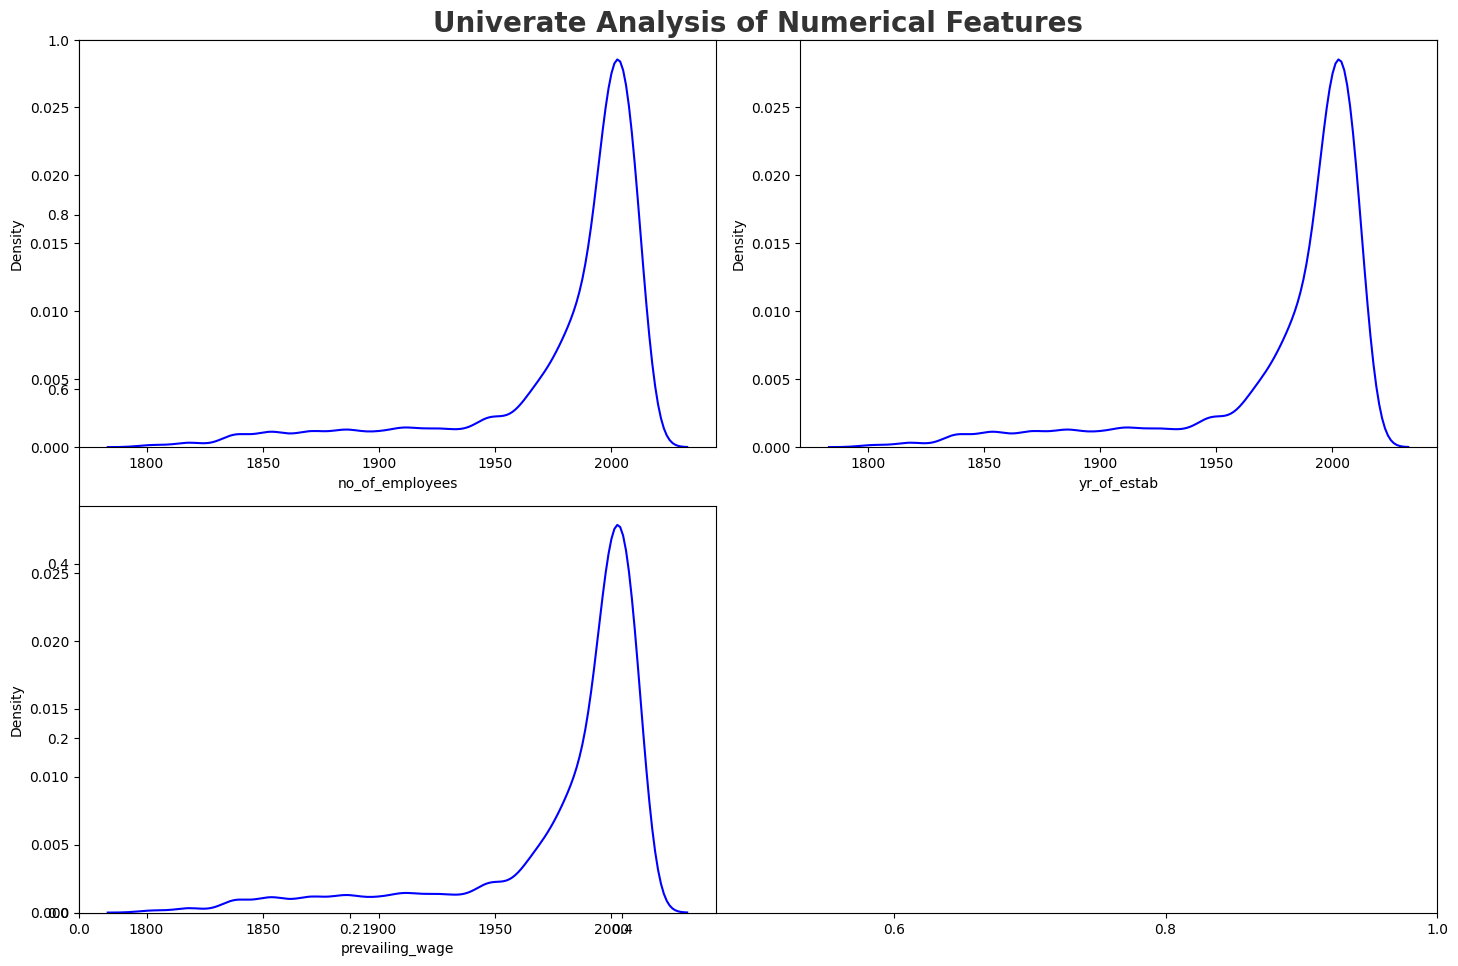

In [9]:
plt.figure(figsize=(15,10))
plt.title("Univerate Analysis of Numerical Features",fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(0,len(numerical_feature)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(df[numerical_feature[1]],color='blue')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()


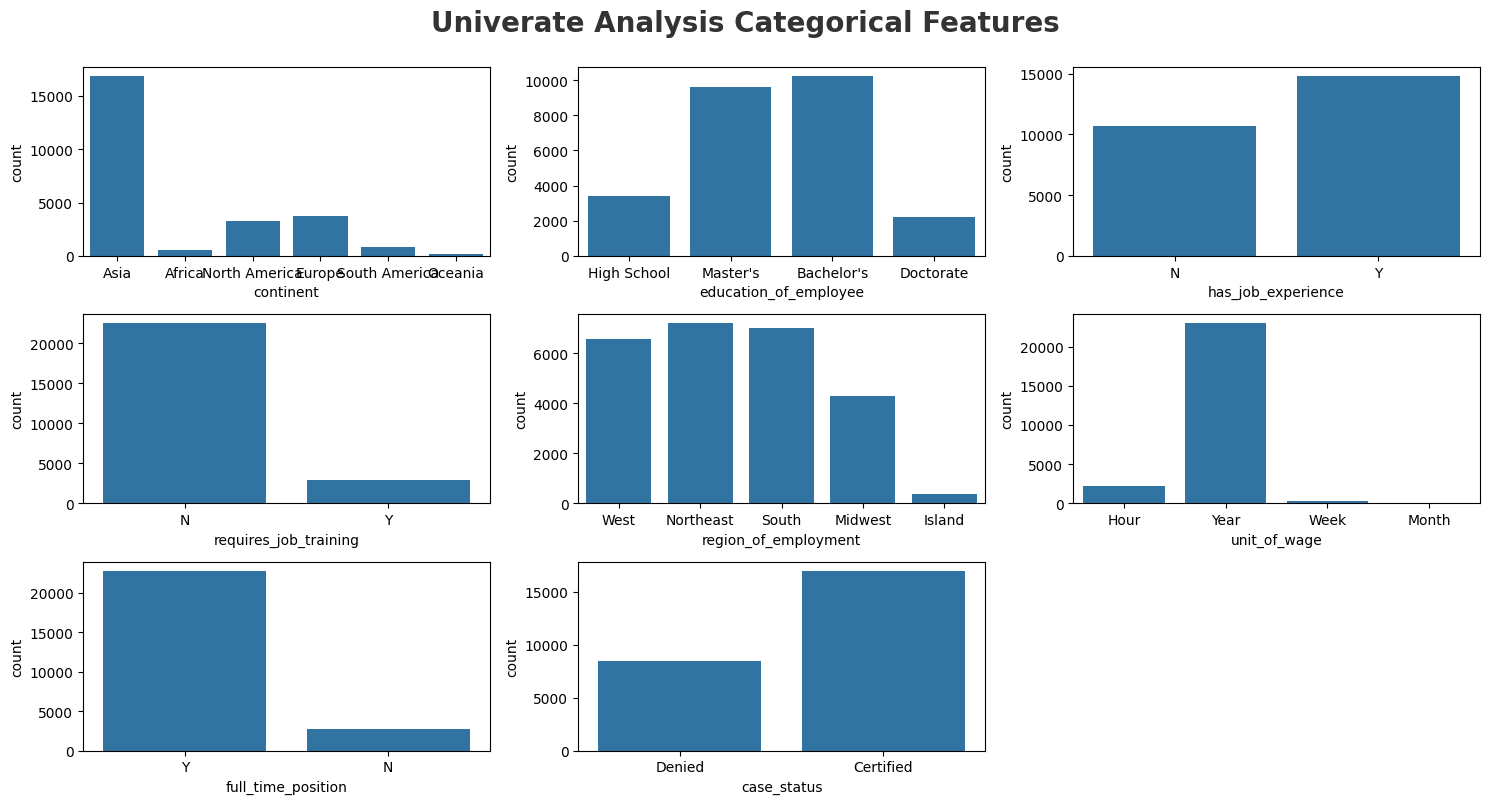

In [10]:
# categorical column
categorical_feature.remove('case_id')
plt.figure(figsize=(15,8))
plt.suptitle("Univerate Analysis Categorical Features",fontsize=20,fontweight='bold',alpha=0.8,y=1.)
for i in range(0,len(categorical_feature)):
    plt.subplot(3,3,i+1)
    sns.countplot(x = df[categorical_feature[i]])
    plt.xlabel(categorical_feature[i])
    plt.tight_layout()




# check Multicollinearity in Numerical Feature

In [11]:

df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [12]:

from scipy.stats import chi2_contingency

chi_test=[]

for col in categorical_feature:
    if chi2_contingency(pd.crosstab(df['case_status'],df[col]))[1]<0.05:
        chi_test.append('Reject Null hypothesis')
    else:
        chi_test.append('Fail to reject null hypothesis')

result = pd.DataFrame(data=[categorical_feature,chi_test]).T
result.columns = ['column','Hypothesis Result']
result


,column,Hypothesis Result
0,continent,Reject Null hypothesis
1,education_of_employee,Reject Null hypothesis
2,has_job_experience,Reject Null hypothesis
3,requires_job_training,Fail to reject null hypothesis
4,region_of_employment,Reject Null hypothesis
5,unit_of_wage,Reject Null hypothesis
6,full_time_position,Reject Null hypothesis
7,case_status,Reject Null hypothesis


In [13]:
continue_feature  = [col for col in numerical_feature if len(df[col].unique())>=10]
print(continue_feature)

['no_of_employees', 'yr_of_estab', 'prevailing_wage']


C:\Users\iamda\AppData\Local\Temp\ipykernel_5452\1233107640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
C:\Users\iamda\AppData\Local\Temp\ipykernel_5452\1233107640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
C:\Users\iamda\AppData\Local\Temp\ipykernel_5452\1233107640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])


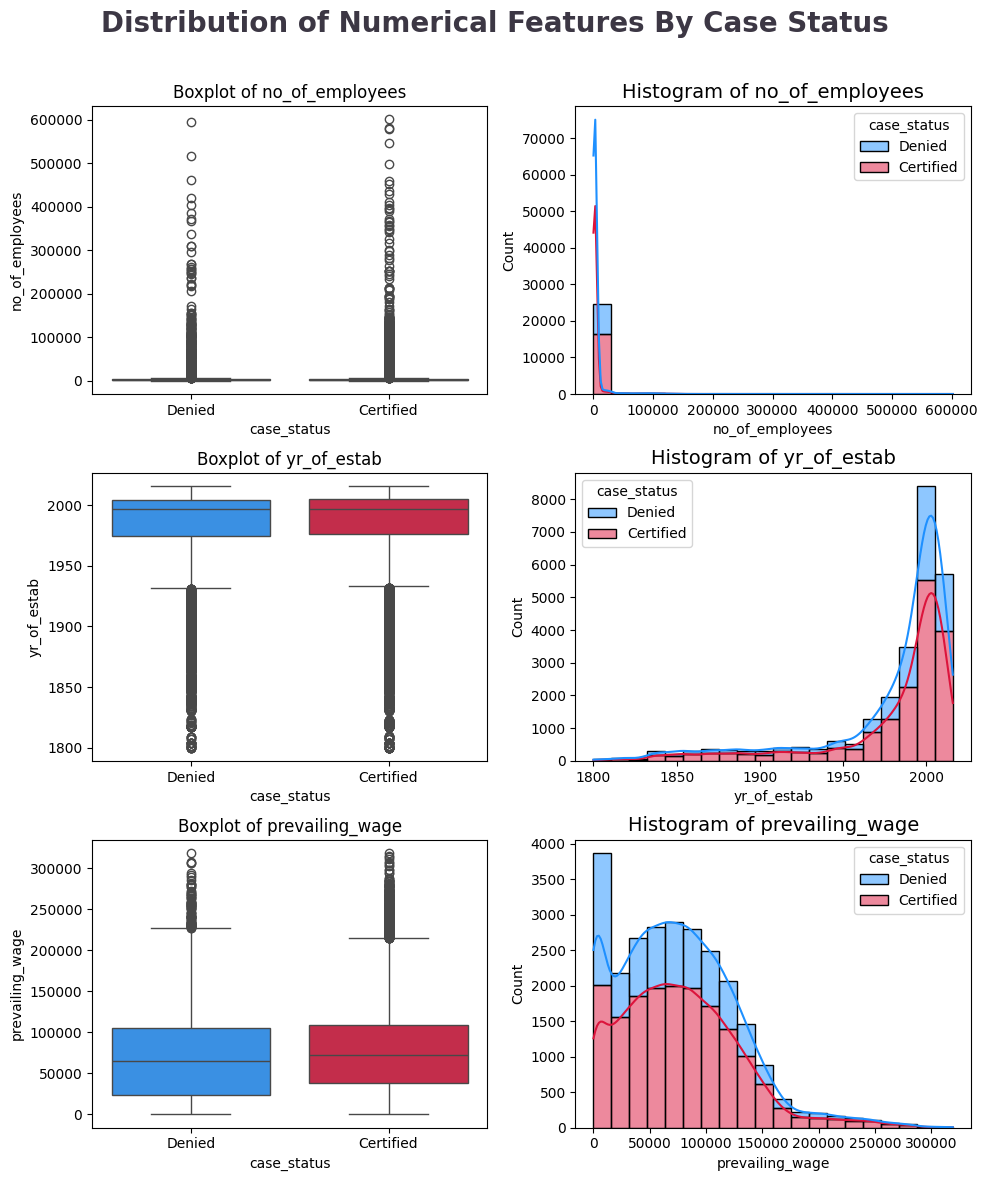

In [14]:

clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continue_feature):   
    sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

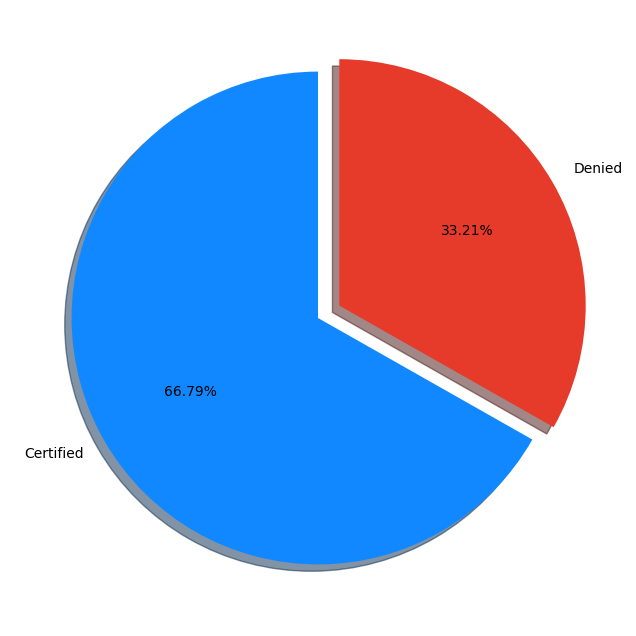

In [15]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified","Denied"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

# Feature Engineering

In [16]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [17]:
df.drop(['case_id'],axis=1,inplace=True)

In [18]:

from datetime import date

today_date = date.today()
current_year = today_date.year

In [19]:
current_year

2025

In [20]:
df['company_age'] = current_year-df['yr_of_estab']
df['company_age']

0         18
1         23
2         17
3        128
4         20
        ... 
25475     17
25476     19
25477    115
25478    138
25479     65
Name: company_age, Length: 25480, dtype: int64

In [21]:
df.drop(['yr_of_estab'],axis=1,inplace=True)

In [22]:

X = df.drop(['case_status'],axis=1)
y = df['case_status']

X.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,18
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,23
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,17
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,128
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,20


In [23]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

In [24]:
import numpy as np

y = np.where(y=='Denied',1,0)
y

array([1, 0, 1, ..., 0, 0, 0])

# Feature Transforming

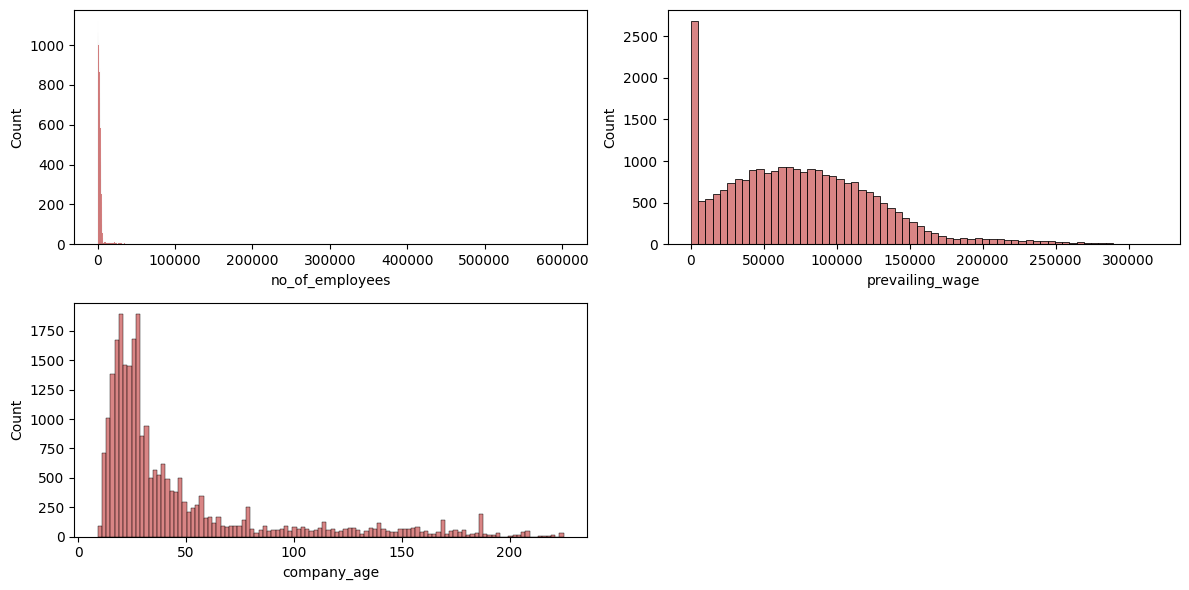

In [25]:

plt.figure(figsize=(12,6))

for i,col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2,2,i+1)
    sns.histplot(x=X[col],color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

# Apply Power transformer

In [26]:

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
transform_feature = ['no_of_employees','company_age']
X_copy = pt.fit_transform(X[transform_feature])
X_copy

array([[ 1.51729976, -0.95555058],
       [ 0.03091211, -0.4670008 ],
       [ 2.88507606, -1.07836334],
       ...,
       [-0.41388512,  1.55020883],
       [-0.11194883,  1.68473893],
       [ 0.21874168,  1.02763813]])

In [27]:
X_copy = pd.DataFrame(X_copy,columns=transform_feature)
X_copy

,no_of_employees,company_age
0,1.517300,-0.955551
1,0.030912,-0.467001
2,2.885076,-1.078363
3,-1.343550,1.630914
4,-0.432287,-0.738126
...,...,...
25475,0.079917,-1.078363
25476,0.235747,-0.842544
25477,-0.413885,1.550209
25478,-0.111949,1.684739


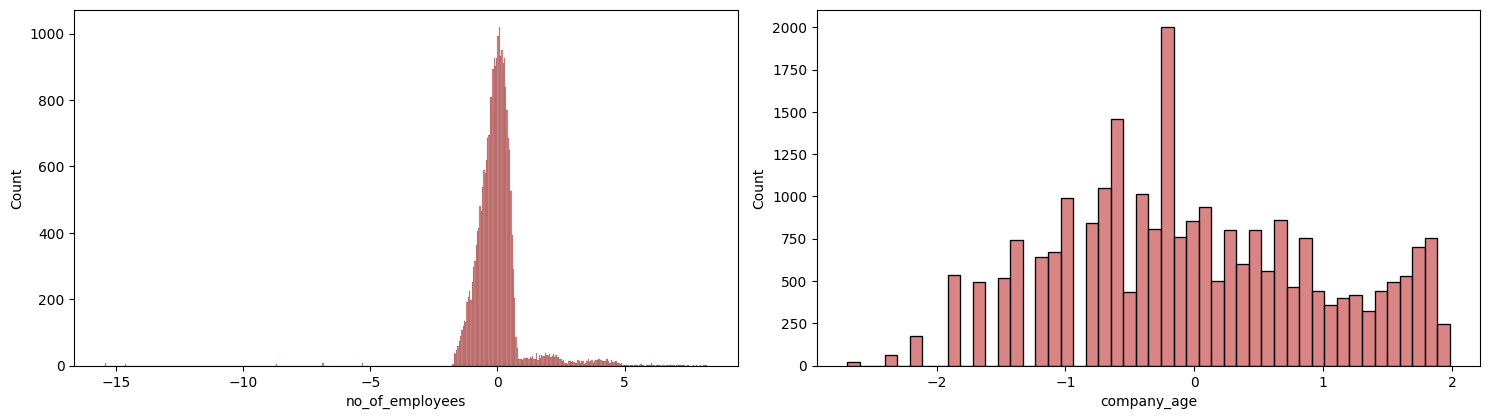

In [28]:
plt.figure(figsize=(15,8))
for i, col in enumerate(transform_feature):
    plt.subplot(2,2,i+1)
    sns.histplot(x=X_copy[col],color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [29]:
num_feature = list(X.select_dtypes(exclude="object").columns)
num_feature

['no_of_employees', 'prevailing_wage', 'company_age']

In [30]:

od_column = ['has_job_experience','requires_job_training','full_time_position','education_of_employee']
ohe_column = ['continent','unit_of_wage','region_of_employment']
transform_column = ['no_of_employees','company_age']

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,PowerTransformer,StandardScaler

scaler = StandardScaler()
oh_transform = OneHotEncoder()
ordinal = OrdinalEncoder()

pipeline = Pipeline(steps=[
    ('transformer',PowerTransformer(method='yeo-johnson'))
])

preprocess = ColumnTransformer([

    ('OneHotEncoder',oh_transform,ohe_column),
    ('ordinary',ordinal,od_column),
    ('transform',pipeline,transform_column),
    ('StandardScaler',scaler,num_feature)
])

X = preprocess.fit_transform(X)
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

In [31]:
from imblearn.combine import SMOTEENN,SMOTETomek

smt = SMOTEENN(random_state=42,sampling_strategy='minority')
X_res,y_res = smt.fit_resample(X,y)
X_res

array([[ 1.        ,  0.        ,  0.        , ..., -0.20041732,
         1.4286038 , -0.60402237],
       [ 0.        ,  1.        ,  0.        , ..., -0.14547246,
         0.07187981, -0.76924882],
       [ 0.        ,  1.        ,  0.        , ..., -0.02981286,
        -0.39421493, -0.3443808 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.12026166,
        -1.40241682, -0.10834301],
       [ 0.        ,  1.        ,  0.        , ..., -0.22805422,
        -1.32200651, -0.34158535],
       [ 0.        ,  1.        ,  0.        , ..., -0.08918221,
        -0.14834558, -0.28108665]])

In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=12)
x_train

array([[ 0.        ,  1.        ,  0.        , ...,  6.03182507,
         0.83067241, -0.32077702],
       [ 0.        ,  1.        ,  0.        , ..., -0.23372518,
        -0.83759393, -0.60402237],
       [ 0.        ,  0.        ,  1.        , ..., -0.15386499,
         1.07838146, -0.60402237],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.21374921,
        -1.37920826, -0.60402237],
       [ 0.        ,  1.        ,  0.        , ..., -0.20120412,
        -0.54813038, -0.58041859],
       [ 0.        ,  1.        ,  0.        , ..., -0.07851261,
        -1.40614882, -0.58041859]])

In [33]:

from sklearn.metrics import (f1_score,accuracy_score,precision_score,roc_auc_score,
                                classification_report,roc_curve,recall_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [34]:

def metrics(true,predicted):
    acc = accuracy_score(true,predicted)
    f1 = f1_score(true,predicted)
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [35]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [36]:

def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=metrics(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=metrics(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [37]:
base_model_report = evaluate_models(X=X_res,y=y_res,models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9487
- F1 score: 0.9527
- Precision: 0.9473
- Recall: 0.9582
- Roc Auc Score: 0.9478


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9261
- F1 score: 0.9319
- Precision: 0.9269
- Recall: 0.9370
- Roc Auc Score: 0.9251


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8897
- F1 score: 0.8965
- Precision: 0.9068
- Recall: 0.8865
- Roc Auc Score: 0.8900
----------------------------------
Model performance for Test set
- Accuracy: 0.8791
- F1 score: 0.8875
- Precision: 0.8919
- Recall: 0.8832
- Roc Auc Score: 0.8788


Logistic Regression
Model performance for Training 

In [38]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.948650
4,K-Neighbors Classifier,0.941608
5,XGBClassifier,0.935153
6,CatBoosting Classifier,0.928110
1,Decision Tree,0.926056
2,Gradient Boosting,0.879108
7,Support Vector Classifier,0.857101
8,AdaBoost Classifier,0.849178
3,Logistic Regression,0.725646


In [39]:
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [41]:

randomcv_models = [
    ('XGBoost', XGBClassifier(), {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)}),

    ("RF", RandomForestClassifier(), {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]}),

    ("KNN", KNeighborsClassifier(), {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9]})
    
]


In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

randomcv_models = [
    #('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

model_param = {}
for name, model, params in randomcv_models:
    print(f"Running RandomizedSearchCV for {name}")
    
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=min(100, len(params)),
        cv=3,
        verbose=2,
        n_jobs=-1,
        scoring='accuracy'  # Specify scoring if necessary
    )
    random.fit(X_res, y_res)  # Ensure X_res and y_res are properly defined
    model_param[name] = random.best_params_

# Print results
for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])


Running RandomizedSearchCV for RF
Fitting 3 folds for each of 3 candidates, totalling 9 fits


c:\Users\iamda\anaconda3\envs\visa\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Running RandomizedSearchCV for KNN
Fitting 3 folds for each of 3 candidates, totalling 9 fits
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 15}
---------------- Best Params for KNN -------------------
{'weights': 'uniform', 'n_neighbors': 3, 'algorithm': 'brute'}


In [45]:

model_param

{'RF': {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 15},
 'KNN': {'weights': 'uniform', 'n_neighbors': 3, 'algorithm': 'brute'}}

In [46]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 0.9782
- F1 score: 0.9798
- Precision: 0.9776
- Recall: 0.9820
- Roc Auc Score: 0.9779
----------------------------------
Model performance for Test set
- Accuracy: 0.9310
- F1 score: 0.9364
- Precision: 0.9326
- Recall: 0.9402
- Roc Auc Score: 0.9302


KNeighborsClassifier
Model performance for Training set
- Accuracy: 0.9837
- F1 score: 0.9850
- Precision: 0.9798
- Recall: 0.9902
- Roc Auc Score: 0.9832
----------------------------------
Model performance for Test set
- Accuracy: 0.9580
- F1 score: 0.9617
- Precision: 0.9482
- Recall: 0.9755
- Roc Auc Score: 0.9565




In [47]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.958040
0,Random Forest Classifier,0.931045


In [48]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(x_train,y_train)
y_pred = best_model.predict(x_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9633
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1571
           1       0.96      0.97      0.97      1837

    accuracy                           0.96      3408
   macro avg       0.96      0.96      0.96      3408
weighted avg       0.96      0.96      0.96      3408



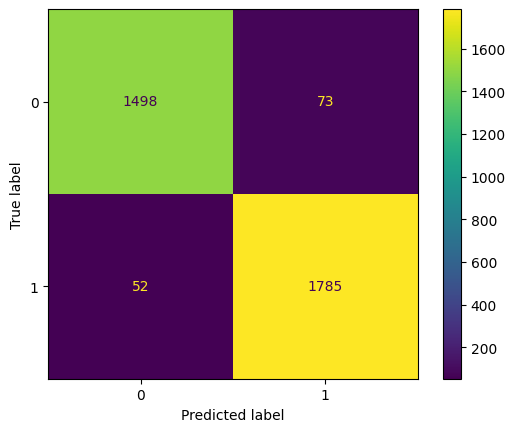

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test)